In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../modules'))
from statistical_methods import StatisticalMethods
from best_pipelines import models_to_cv
import matplotlib.colors as mcolors
import seaborn as sns
import math
import matplotlib.pyplot as plt
from results_visualization import plot_metric_boxplots, plot_time_vs_performance_scatter

In [2]:
best_pipelines, ensembles = models_to_cv()

metrics = {}
for model in best_pipelines.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

In [3]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'precision', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [4]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,train_accuracy,0.990190,0.000733,"0.9897, 0.9906"
1,KNN,test_accuracy,0.963334,0.005007,"0.9602, 0.9664"
2,KNN,ACSA,0.962301,0.005026,"0.9592, 0.9654"
3,KNN,recall,0.972244,0.006639,"0.9681, 0.9764"
4,KNN,precision,0.961766,0.005689,"0.9582, 0.9653"
...,...,...,...,...,...
75,ANNs,recall,0.976616,0.008417,"0.9714, 0.9818"
76,ANNs,precision,0.969517,0.008373,"0.9643, 0.9747"
77,ANNs,f1_score,0.973001,0.004445,"0.9702, 0.9758"
78,ANNs,training_time,91.144984,9.627399,"85.1779, 97.1121"


In [5]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,Acurácia de treino,99.02,0.07,"[98.97 , 99.06]"
1,KNN,Acurácia de teste,96.33,0.50,"[96.02 , 96.64]"
2,KNN,ACSA,96.23,0.50,"[95.92 , 96.54]"
3,KNN,Recall,97.22,0.66,"[96.81 , 97.64]"
4,KNN,Precisão,96.18,0.57,"[95.82 , 96.53]"
...,...,...,...,...,...
75,ANNs,Recall,97.66,0.84,"[97.14 , 98.18]"
76,ANNs,Precisão,96.95,0.84,"[96.43 , 97.47]"
77,ANNs,F1-score,97.30,0.44,"[97.02 , 97.58]"
78,ANNs,Tempo de treinamento,91.10,9.60,"[8517.79 , 9711.21]"


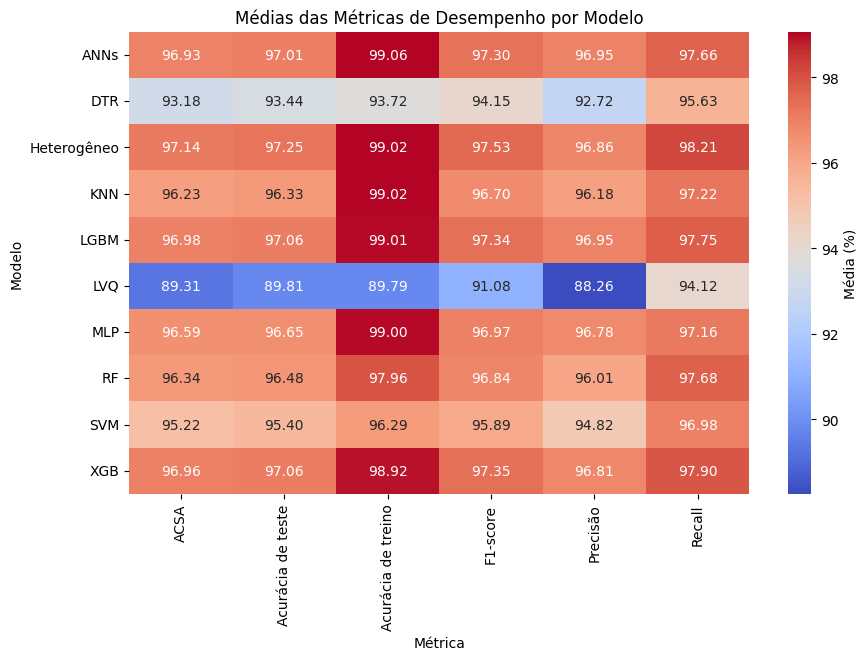

In [6]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'Precisão', 'F1-score', 'Acurácia de treino', 'Acurácia de teste'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

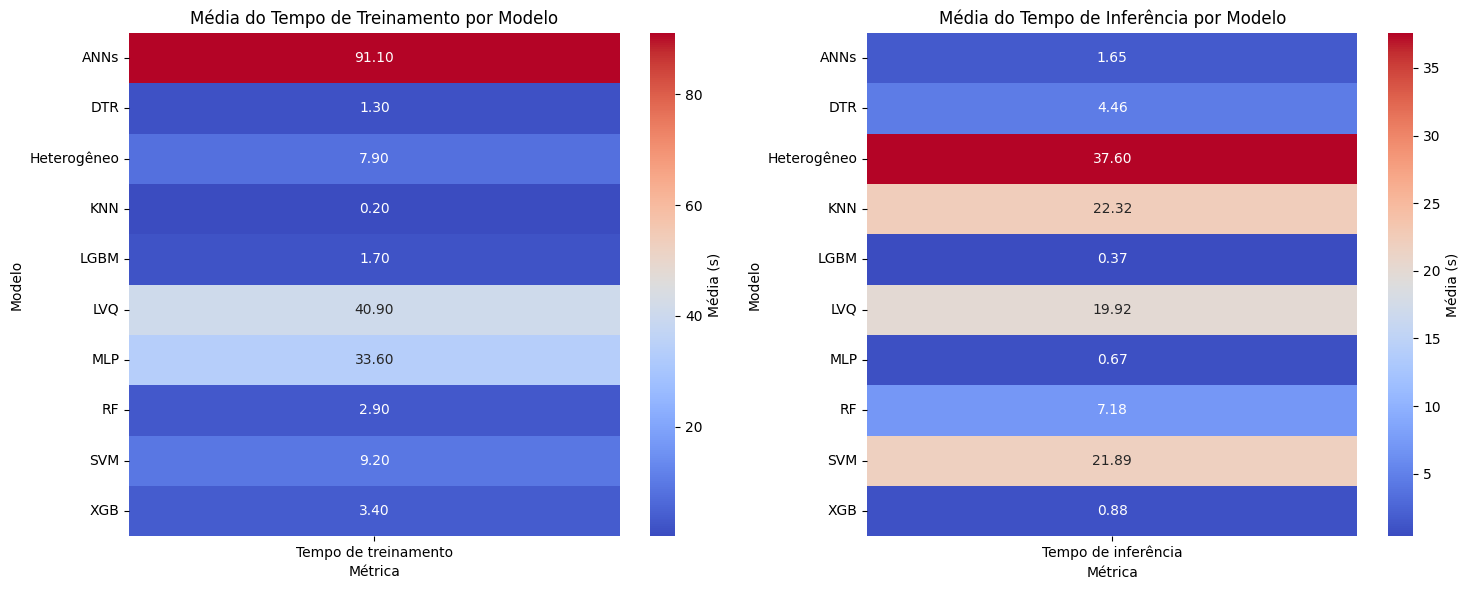

In [8]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [9]:
friedman_results

,metric,statistic,p-value,are_different
0,train_accuracy,79.733861,1.825300e-13,True
1,test_accuracy,73.815403,2.706738e-12,True
2,ACSA,75.047330,1.546656e-12,True
3,recall,57.837905,3.491531e-09,True
4,f1_score,72.786408,4.316741e-12,True
5,training_time,88.930909,2.667339e-15,True
6,inference_time,84.798666,1.789704e-14,True


In [10]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,train_accuracy,KNN vs LVQ,2.724241e-05,True
1,train_accuracy,KNN vs DTR,9.055827e-04,True
2,train_accuracy,KNN vs SVM,1.634887e-02,True
3,train_accuracy,KNN vs RF,1.468623e-01,False
4,train_accuracy,KNN vs XGB,7.053513e-01,False
...,...,...,...,...
310,inference_time,LGBM vs Heterogêneo,4.973169e-08,True
311,inference_time,LGBM vs ANNs,8.544355e-01,False
312,inference_time,MLP vs Heterogêneo,5.789859e-07,True
313,inference_time,MLP vs ANNs,9.752367e-01,False


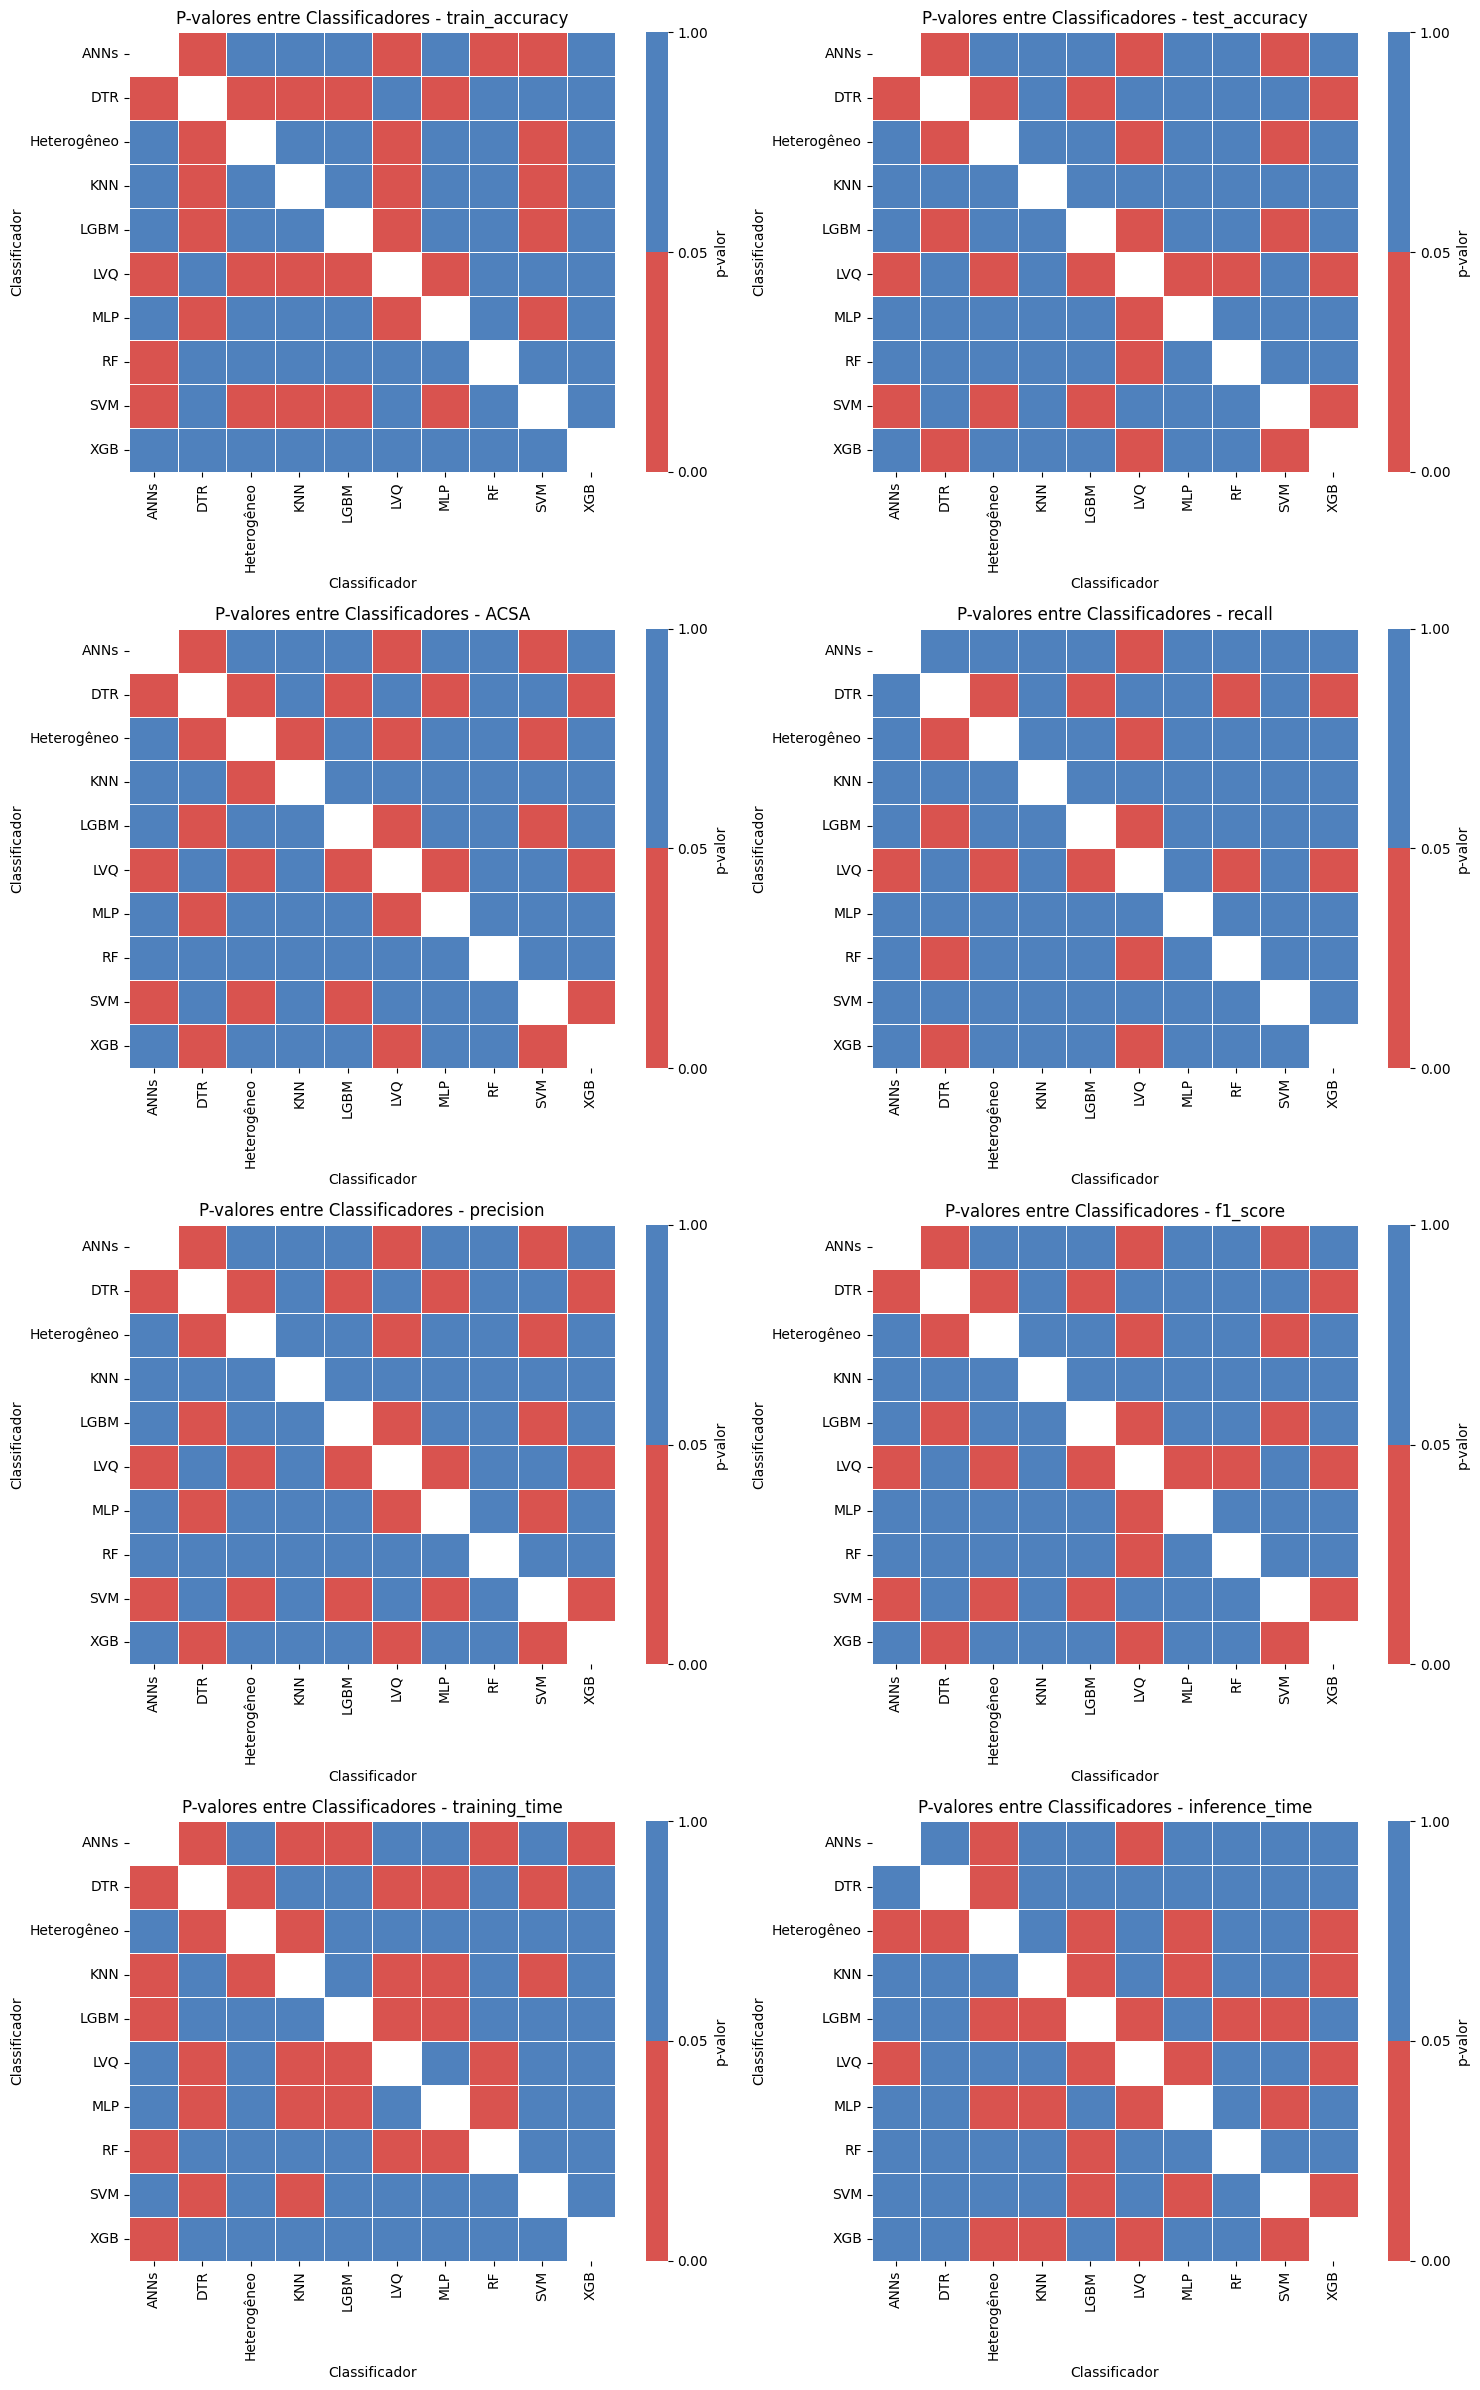

In [7]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric}")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [8]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
0,train_accuracy,KNN vs LVQ,2.724241e-05,True,KNN,LVQ
1,train_accuracy,KNN vs DTR,9.055827e-04,True,KNN,DTR
2,train_accuracy,KNN vs SVM,1.634887e-02,True,KNN,SVM
13,train_accuracy,LVQ vs LGBM,5.749325e-05,True,LVQ,LGBM
14,train_accuracy,LVQ vs MLP,8.281485e-05,True,LVQ,MLP
...,...,...,...,...,...,...
346,inference_time,RF vs LGBM,4.306208e-02,True,RF,LGBM
352,inference_time,XGB vs Heterogêneo,1.099139e-06,True,XGB,Heterogêneo
355,inference_time,LGBM vs Heterogêneo,4.973169e-08,True,LGBM,Heterogêneo
357,inference_time,MLP vs Heterogêneo,5.789859e-07,True,MLP,Heterogêneo


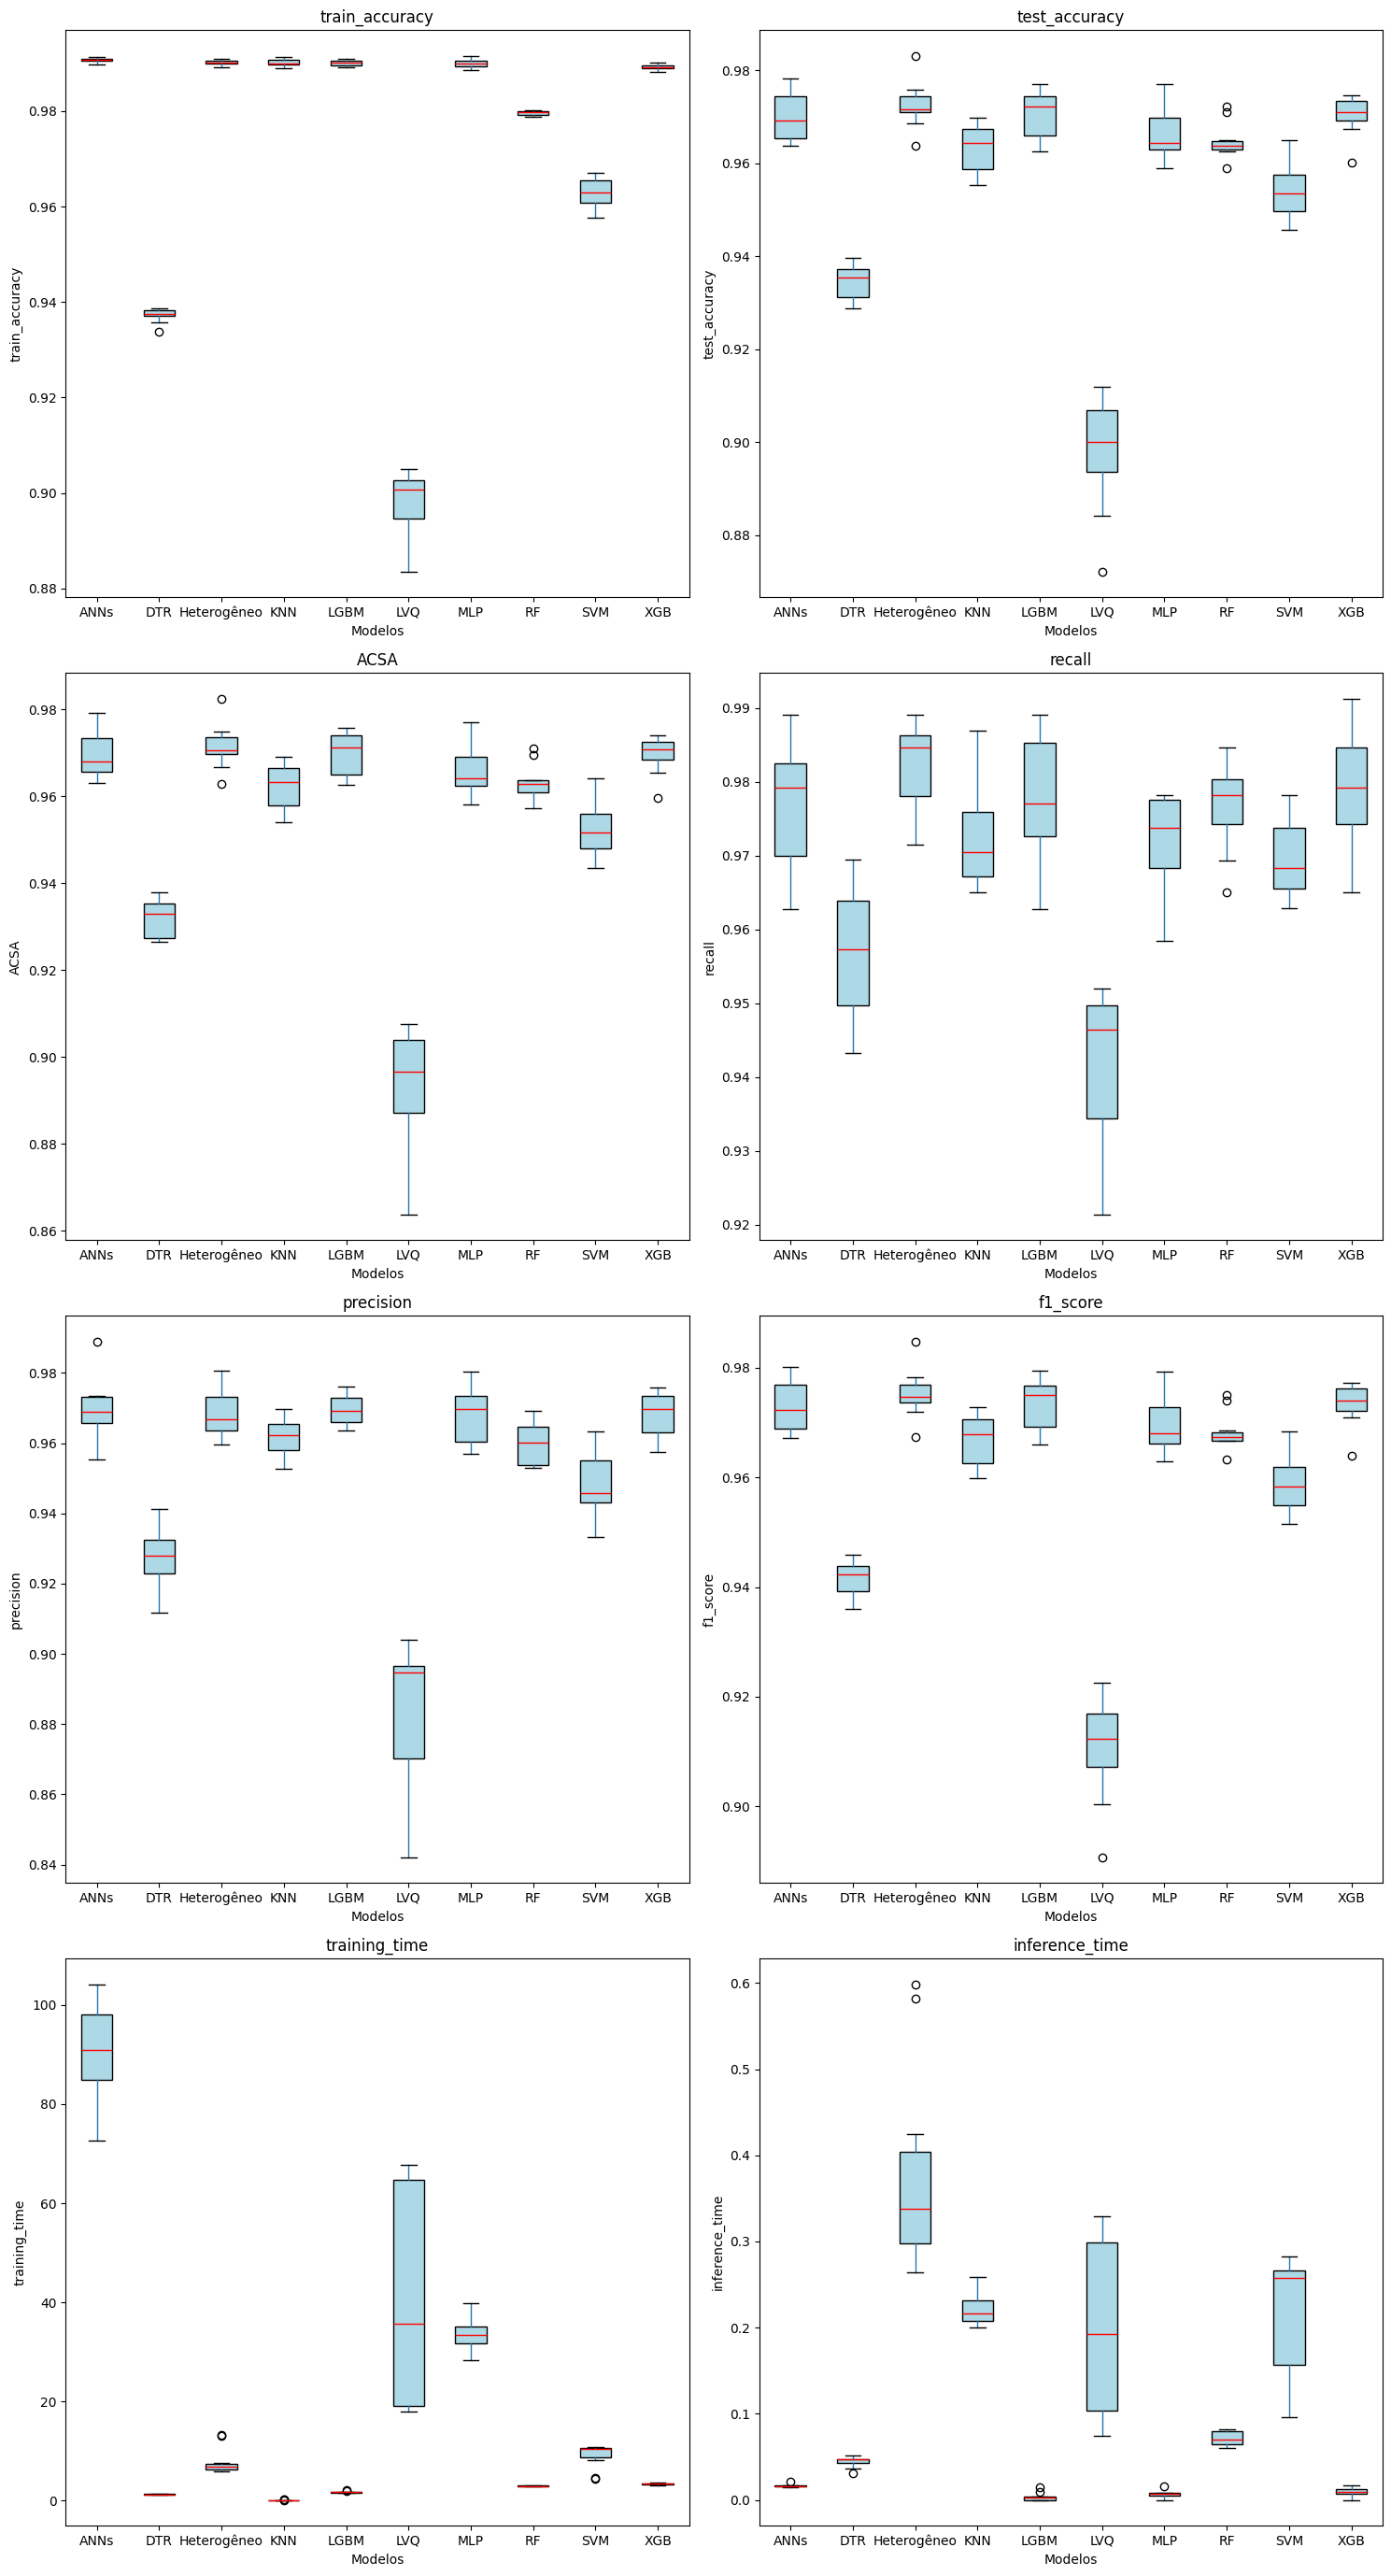

In [10]:
plot_metric_boxplots(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'precision', 'f1_score', 'training_time', 'inference_time']
)

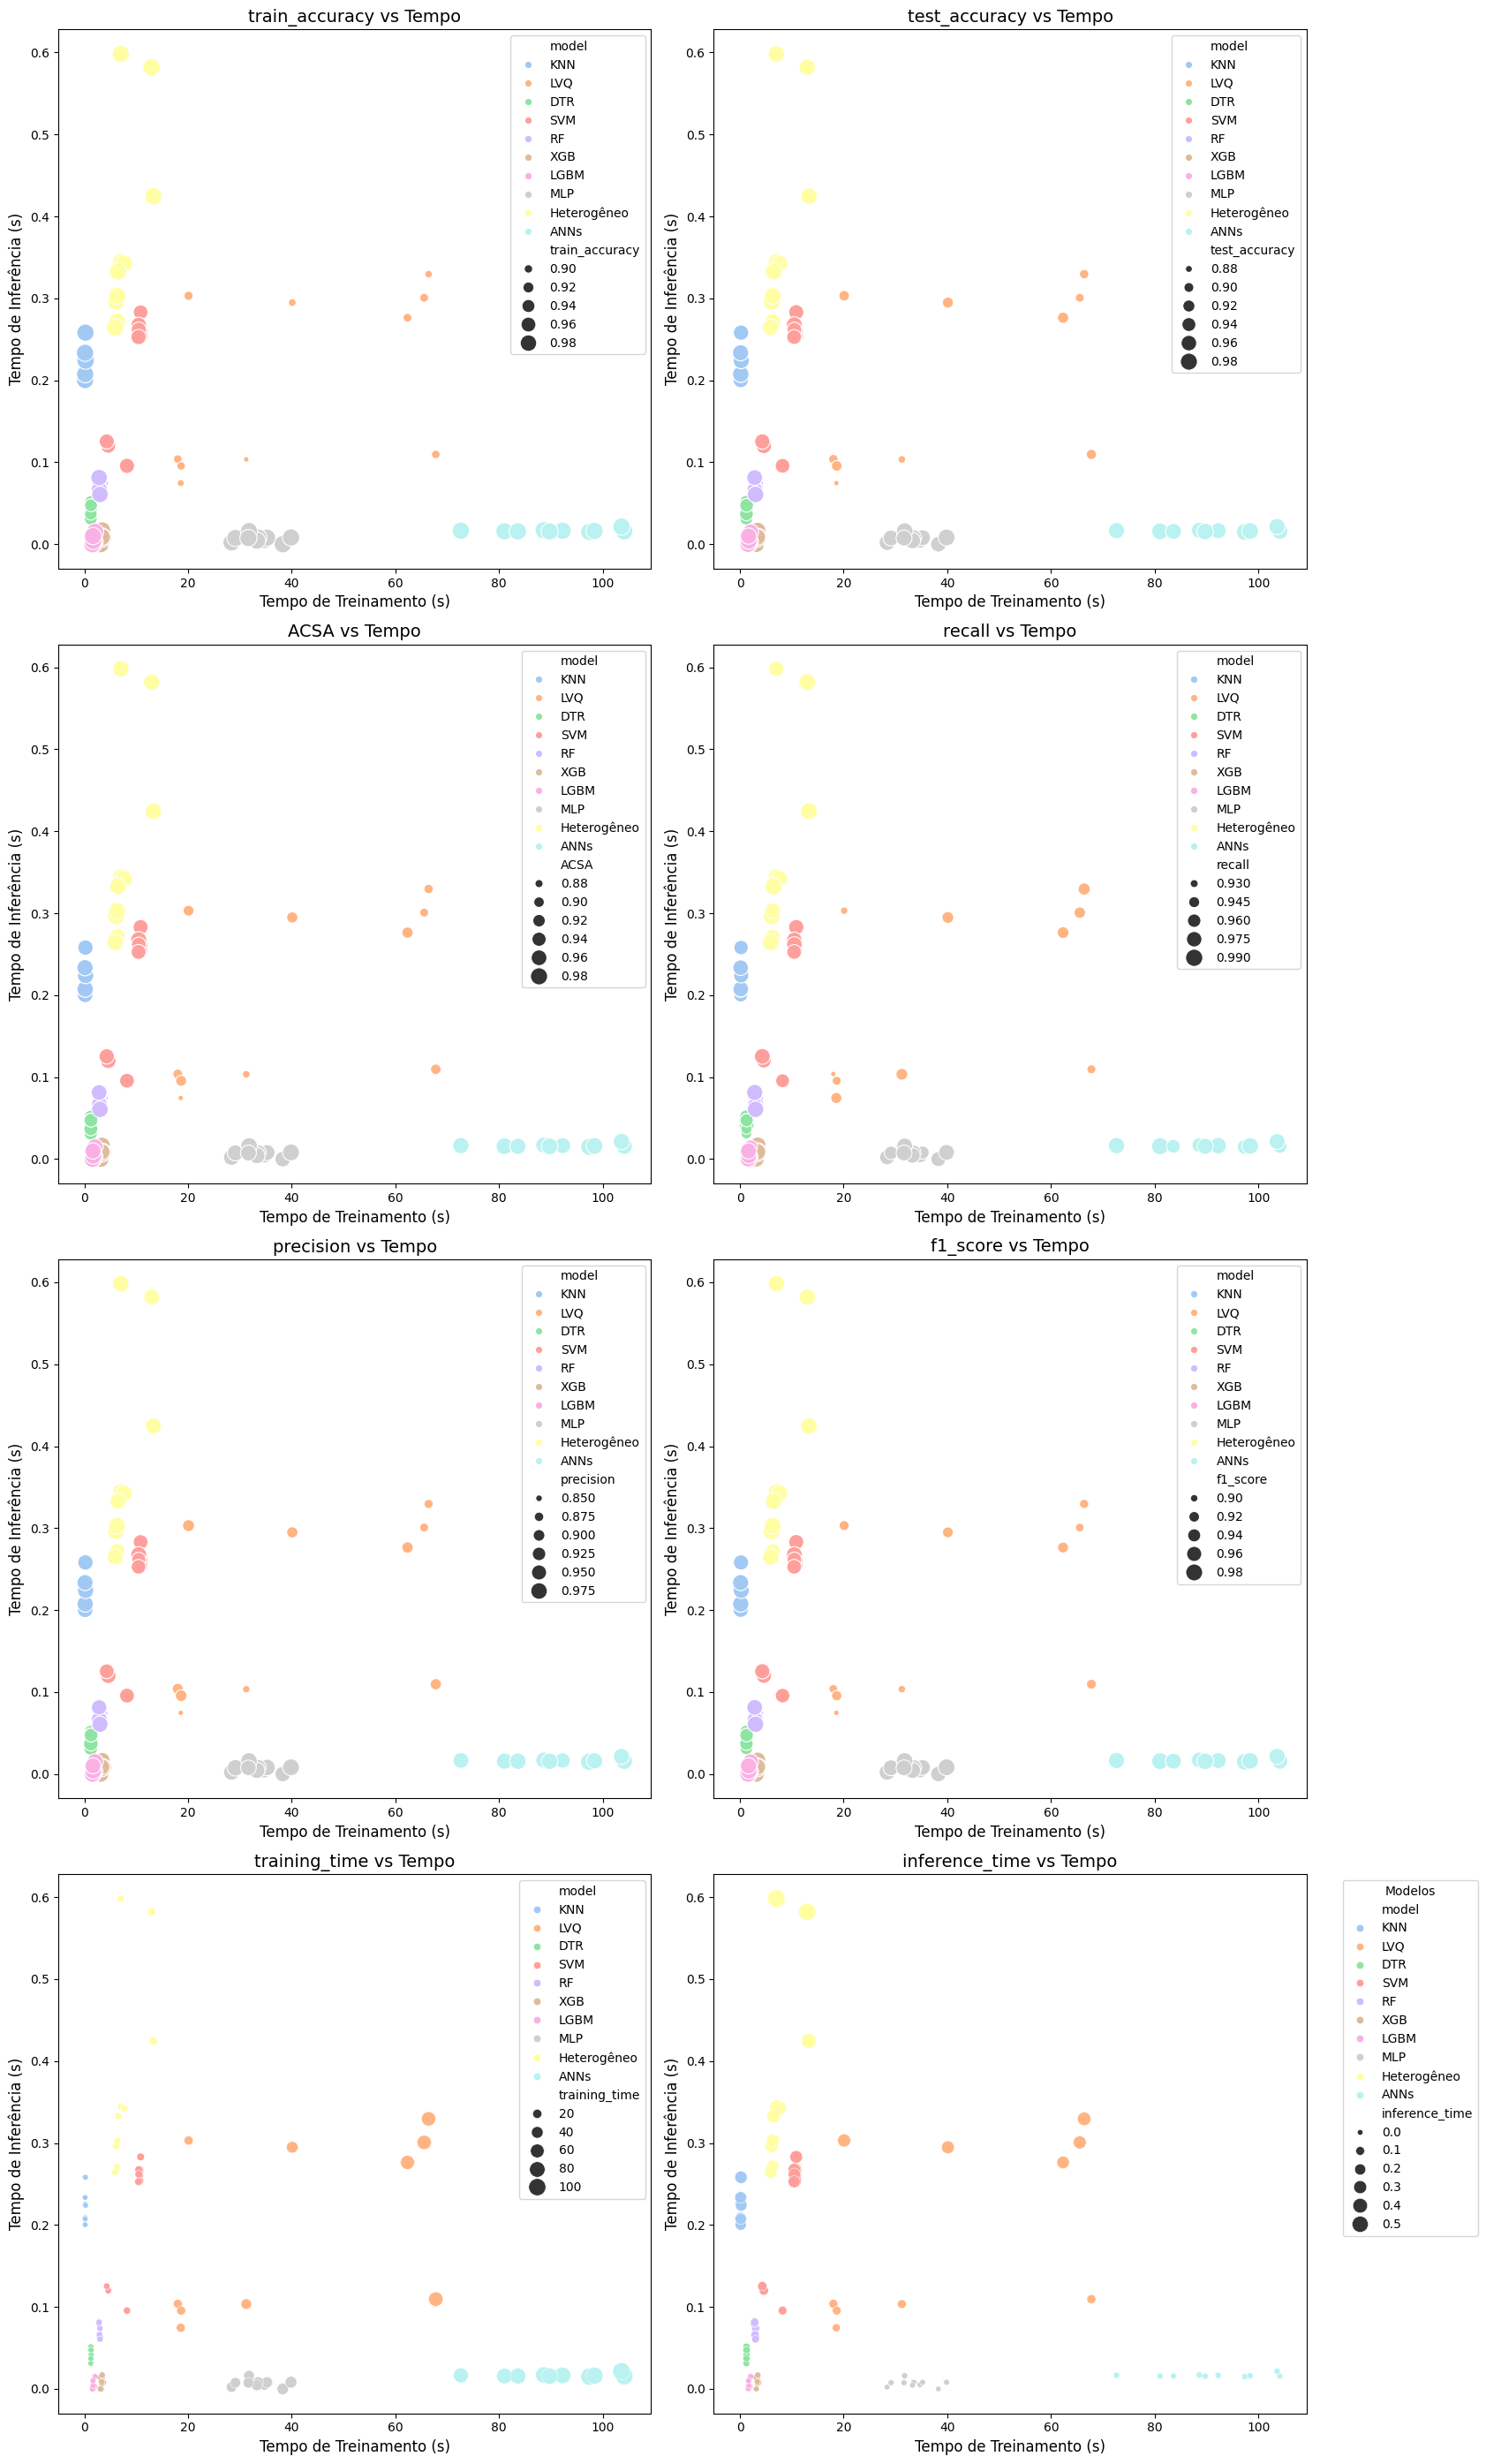

In [11]:
plot_time_vs_performance_scatter(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'precision', 'f1_score', 'training_time', 'inference_time']
)
